Mounted at /content/drive
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 149s 13ms/step - loss: 0.0029
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 151s 13ms/step - loss: 0.0014
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 142s 12ms/step - loss: 0.0012
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


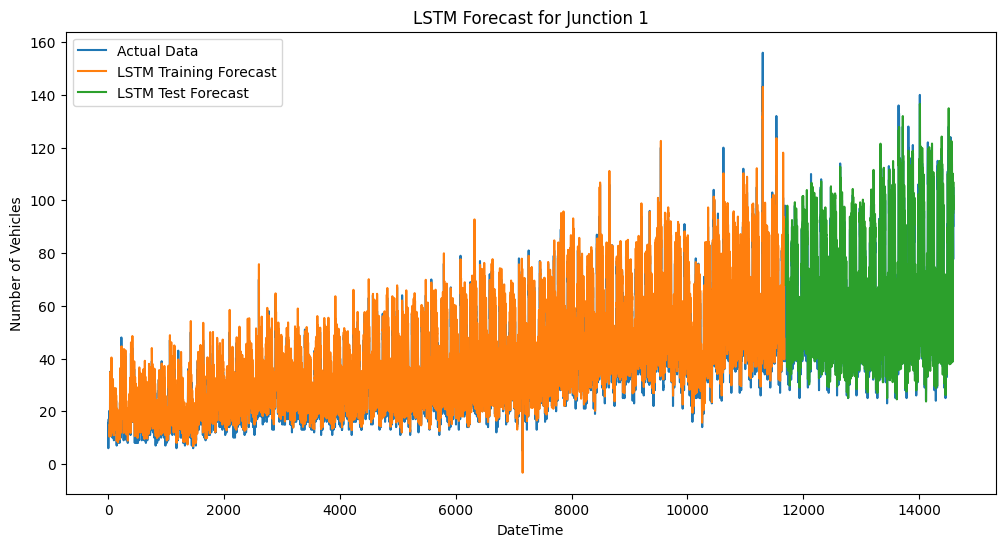

Train MSE: 36.83708515543909
Train MAE: 4.759673693514133
Train R²: 0.9000804060328773
Train MAPE: 0.136012888141328
Test MSE: 57.80228154387045
Test MAE: 6.181469196274766
Test R²: 0.8967888817515942
Test MAPE: 0.1011115379963223
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 154s 13ms/step - loss: 0.0039
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 149s 13ms/step - loss: 0.0030
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 205s 13ms/step - loss: 0.0027
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


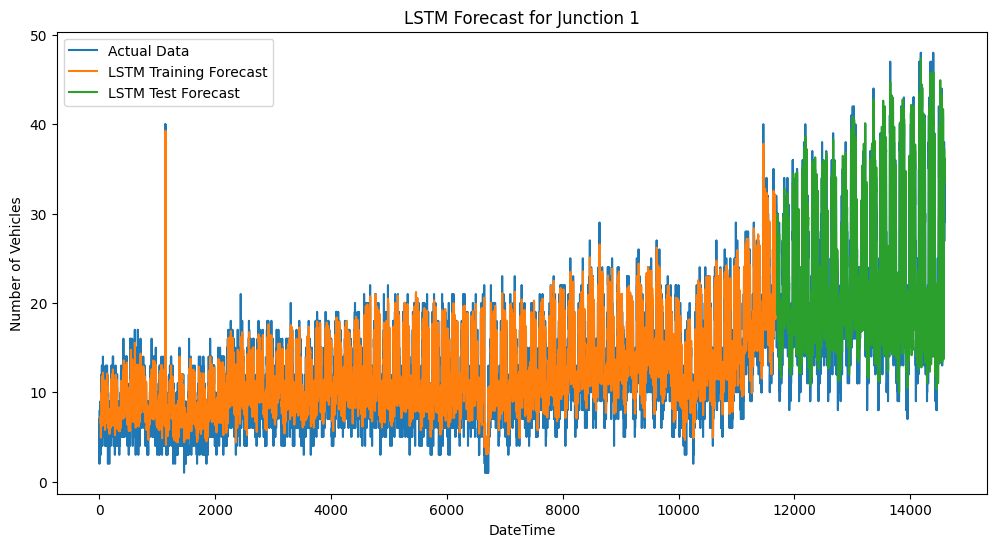

Train MSE: 6.0000836294444415
Train MAE: 1.9425561521611698
Train R²: 0.7453205900013846
Train MAPE: 0.2075730134016523
Test MSE: 11.4315856407303
Test MAE: 2.719902222125219
Test R²: 0.8328471346102166
Test MAPE: 0.13023839218832925
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11648/11648 ━━━━━━━━━━━━━━━━━━━━ 156s 13ms/step - loss: 0.0014
Epoch 2/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 204s 13ms/step - loss: 0.0011
Epoch 3/3
11648/11648 ━━━━━━━━━━━━━━━━━━━━ 200s 13ms/step - loss: 7.9549e-04
364/364 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


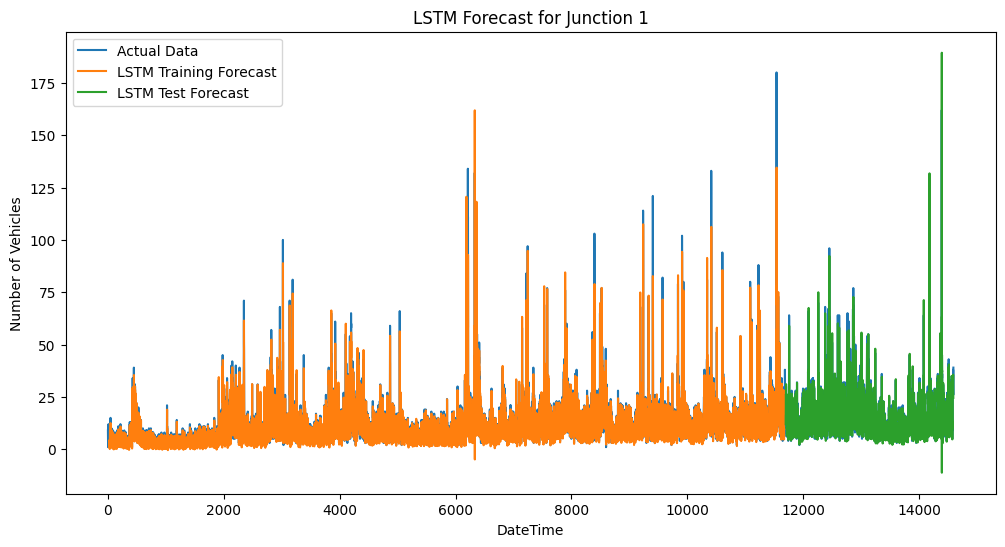

Train MSE: 30.483199950641882
Train MAE: 3.225192300066068
Train R²: 0.7079916854290973
Train MAPE: 0.3078742213120985
Test MSE: 45.34864287750623
Test MAE: 3.6759340223478465
Test R²: 0.5838789052453781
Test MAPE: 0.21610272573783457
Epoch 1/3


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3450/3450 ━━━━━━━━━━━━━━━━━━━━ 51s 14ms/step - loss: 0.0073
Epoch 2/3
3450/3450 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - loss: 0.0057
Epoch 3/3
1236/3450 ━━━━━━━━━━━━━━━━━━━━ 29s 13ms/step - loss: 0.0066

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive

# Load the dataset
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/traffic.csv')

# Convert the DateTime column to datetime format
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')

# Set DateTime as the index
df.set_index('DateTime', inplace=True)


# Create dataset function
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Select data for a specific junction
for i in range(1,5,1):
  junction = i
  df_junction = df[df['Junction'] == junction]['Vehicles']

# Prepare data for LSTM
  scaler = MinMaxScaler(feature_range=(0, 1))
  df_junction_scaled = scaler.fit_transform(df_junction.values.reshape(-1, 1))

# Split data into training and testing sets
  train_size = int(len(df_junction_scaled) * 0.8)
  train, test = df_junction_scaled[:train_size], df_junction_scaled[train_size:]



  look_back = 24
  X_train, y_train = create_dataset(train, look_back)
  X_test, y_test = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
  X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
  X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build the LSTM model
  model = Sequential()
  model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
  model.add(LSTM(50, return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))
  model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
  model.fit(X_train, y_train, batch_size=1, epochs=3)

# Make predictions
  train_predict = model.predict(X_train)
  test_predict = model.predict(X_test)

# Invert predictions
  train_predict = scaler.inverse_transform(train_predict)
  y_train = scaler.inverse_transform([y_train])
  test_predict = scaler.inverse_transform(test_predict)
  y_test = scaler.inverse_transform([y_test])

# Create a new dataframe to align the predictions with the dates
  train_predict_plot = np.empty_like(df_junction_scaled)
  train_predict_plot[:, :] = np.nan
  train_predict_plot[look_back:len(train_predict) + look_back, :] = train_predict

  test_predict_plot = np.empty_like(df_junction_scaled)
  test_predict_plot[:, :] = np.nan
  test_predict_plot[len(train_predict) + (look_back * 2) + 1:len(df_junction_scaled) - 1, :] = test_predict

# Plot LSTM forecast
  plt.figure(figsize=(12, 6))
  plt.plot(scaler.inverse_transform(df_junction_scaled), label='Actual Data')
  plt.plot(train_predict_plot, label='LSTM Training Forecast')
  plt.plot(test_predict_plot, label='LSTM Test Forecast')
  plt.title('LSTM Forecast for Junction 1')
  plt.xlabel('DateTime')
  plt.ylabel('Number of Vehicles')
  plt.legend()
  plt.show()

# Performance evaluation
  train_mse = mean_squared_error(y_train[0], train_predict)
  train_mae = mean_absolute_error(y_train[0], train_predict)
  test_mse = mean_squared_error(y_test[0], test_predict)
  test_mae = mean_absolute_error(y_test[0], test_predict)

# Calculate R² score and MAPE for additional accuracy evaluation
  train_r2 = r2_score(y_train[0], train_predict)
  test_r2 = r2_score(y_test[0], test_predict)
  train_mape = mean_absolute_percentage_error(y_train[0], train_predict)
  test_mape = mean_absolute_percentage_error(y_test[0], test_predict)

  print(f'Train MSE: {train_mse}')
  print(f'Train MAE: {train_mae}')
  print(f'Train R²: {train_r2}')
  print(f'Train MAPE: {train_mape}')
  print(f'Test MSE: {test_mse}')
  print(f'Test MAE: {test_mae}')
  print(f'Test R²: {test_r2}')
  print(f'Test MAPE: {test_mape}')


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


729/729 ━━━━━━━━━━━━━━━━━━━━ 23s 26ms/step - loss: 0.0081 - val_loss: 0.0019
Epoch 2/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 20s 27ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 3/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 4/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 9.9532e-04 - val_loss: 0.0013
Epoch 5/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 21s 25ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 6/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - loss: 9.0622e-04 - val_loss: 0.0013
Epoch 7/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - loss: 8.6591e-04 - val_loss: 0.0011
Epoch 8/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - loss: 8.8721e-04 - val_loss: 0.0011
Epoch 9/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - loss: 8.6964e-04 - val_loss: 0.0013
Epoch 10/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - loss: 8.4043e-04 - val_loss: 9.4635e-04
Epoch 11/20
729/729 ━━━━━━━━━━━━━━━━━━━━ 23s 28ms/step - loss: 8.8351e-04 - val_loss: 9.7431e-04
Epoch

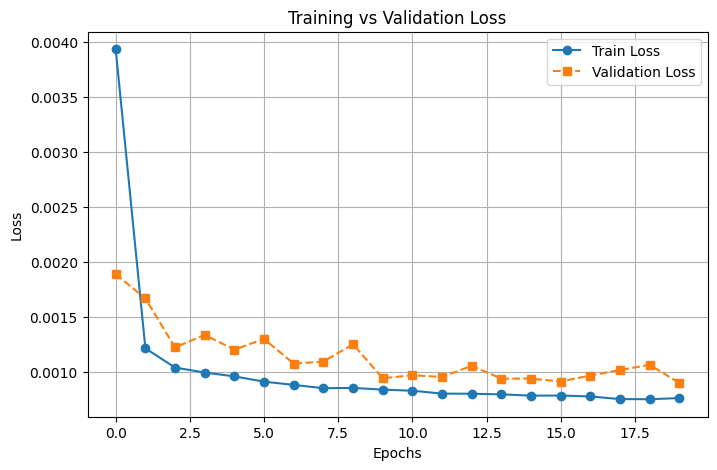

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/traffic.csv')

# Convert DateTime column to datetime format and sort by time
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.sort_values(by='DateTime', inplace=True)
df.set_index('DateTime', inplace=True)

# Select data for a specific junction
junction = 1
df_junction = df[df['Junction'] == junction]['Vehicles'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_junction_scaled = scaler.fit_transform(df_junction)

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Split data into training (80%), validation (10%), and testing (10%)
look_back = 24
train_size = int(len(df_junction_scaled) * 0.8)
val_size = int(len(df_junction_scaled) * 0.1)

train = df_junction_scaled[:train_size]
val = df_junction_scaled[train_size:train_size + val_size]
test = df_junction_scaled[train_size + val_size:]

X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(64, return_sequences=False),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model and store history
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1, epochs=20,
    callbacks=[early_stopping], verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='s', linestyle='dashed', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


292/292 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step

Green Light Plan for Junction 1:
Phase 1: 60.0 seconds
Phase 2: 60.0 seconds
Phase 3: 60.0 seconds
Phase 4: 60.0 seconds


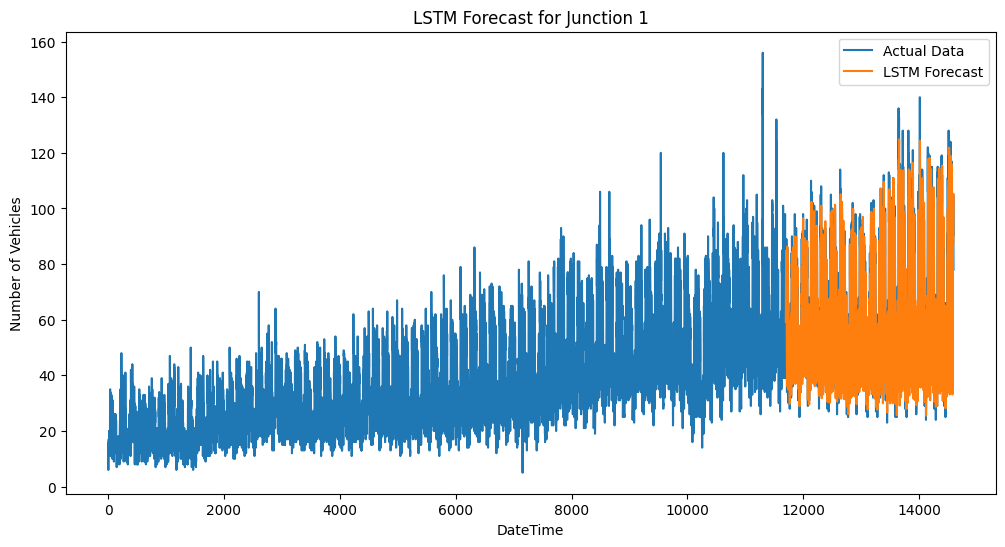

Junction 1:
Train MSE: 16.25870281959218, Train MAE: 3.0368037964618333, Train R²: 0.9376066049854929, Train MAPE: 0.10702907750638722
Test MSE: 42.22849710565916, Test MAE: 4.724735768152749, Test R²: 0.9245972599729182, Test MAPE: 0.07214672609577906



In [8]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Calculate green light durations
def calculate_green_time(traffic_count):
    total_traffic = traffic_count
    if total_traffic == 0:
        return 60  # Default 60s if no traffic detected
    return (traffic_count / total_traffic) * 60

latest_predictions = test_predict[-4:].flatten()
green_durations = [calculate_green_time(count) for count in latest_predictions]

print(f"\nGreen Light Plan for Junction {junction}:")
for i, duration in enumerate(green_durations):
    print(f"Phase {i + 1}: {round(duration, 2)} seconds")

# Plot LSTM forecast
train_predict_plot = np.empty_like(df_junction_scaled)
train_predict_plot[:, :] = np.nan
train_predict_plot[train_size + look_back:train_size + look_back + len(test_predict), :] = test_predict


plt.figure(figsize=(12, 6))
plt.plot(scaler.inverse_transform(df_junction_scaled), label='Actual Data')
plt.plot(train_predict_plot, label='LSTM Forecast')
plt.title(f'LSTM Forecast for Junction {junction}')
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.legend()
plt.show()

# Performance evaluation
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])
train_mse = mean_squared_error(y_train_actual[0], train_predict)
test_mse = mean_squared_error(y_test_actual[0], test_predict)
train_mae = mean_absolute_error(y_train_actual[0], train_predict)
test_mae = mean_absolute_error(y_test_actual[0], test_predict)
train_r2 = r2_score(y_train_actual[0], train_predict)
test_r2 = r2_score(y_test_actual[0], test_predict)
train_mape = mean_absolute_percentage_error(y_train_actual[0], train_predict)
test_mape = mean_absolute_percentage_error(y_test_actual[0], test_predict)

print(f'Junction {junction}:')
print(f'Train MSE: {train_mse}, Train MAE: {train_mae}, Train R²: {train_r2}, Train MAPE: {train_mape}')
print(f'Test MSE: {test_mse}, Test MAE: {test_mae}, Test R²: {test_r2}, Test MAPE: {test_mape}\n')


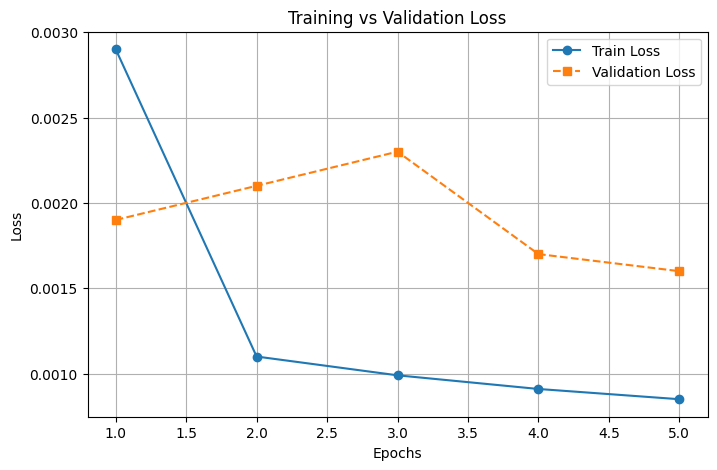

In [9]:
import matplotlib.pyplot as plt

# Manually entering loss and val_loss values
epochs = [1, 2, 3, 4, 5]
train_loss = [0.0029, 0.0011, 0.00099, 0.00091, 0.00085]
val_loss = [0.0019, 0.0021, 0.0023, 0.0017, 0.0016]

plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, marker='o', label='Train Loss')
plt.plot(epochs, val_loss, marker='s', linestyle='dashed', label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/traffic.csv')

# Convert DateTime column to datetime format and sort by time
df['DateTime'] = pd.to_datetime(df['DateTime'], errors='coerce')
df.sort_values(by='DateTime', inplace=True)
df.set_index('DateTime', inplace=True)

# Select data for a specific junction
junction = 1
df_junction = df[df['Junction'] == junction]['Vehicles'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
df_junction_scaled = scaler.fit_transform(df_junction)

# Create dataset function
def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

# Split data into training (80%), validation (10%), and testing (10%)
look_back = 24
train_size = int(len(df_junction_scaled) * 0.8)
val_size = int(len(df_junction_scaled) * 0.1)

train = df_junction_scaled[:train_size]
val = df_junction_scaled[train_size:train_size + val_size]
test = df_junction_scaled[train_size + val_size:]

X_train, y_train = create_dataset(train, look_back)
X_val, y_val = create_dataset(val, look_back)
X_test, y_test = create_dataset(test, look_back)

# Reshape for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
model = Sequential([
    LSTM(32, return_sequences=True, input_shape=(look_back, 1)),
    LSTM(32, return_sequences=False),
    Dense(16, activation='relu'),
    Dense(1)
])

from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005, decay=1e-6)
model.compile(optimizer=optimizer, loss='mean_squared_error')


# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True)

# Train the model and store history
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=8, epochs=20,
    callbacks=[early_stopping], verbose=1
)

# Plot training & validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], marker='o', label='Train Loss')
plt.plot(history.history['val_loss'], marker='s', linestyle='dashed', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid()
plt.show()


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


1457/1457 ━━━━━━━━━━━━━━━━━━━━ 33s 20ms/step - loss: 0.0093 - val_loss: 0.0021
Epoch 2/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 40s 19ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 3/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - loss: 0.0012 - val_loss: 0.0019
Epoch 4/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 39s 20ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 5/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 41s 20ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 6/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 7/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 8/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 41s 19ms/step - loss: 0.0010 - val_loss: 0.0016
Epoch 9/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - loss: 9.7368e-04 - val_loss: 0.0012
Epoch 10/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - loss: 9.7009e-04 - val_loss: 0.0014
Epoch 11/20
1457/1457 ━━━━━━━━━━━━━━━━━━━━ 29s 20ms/step - loss: 9.6582e-04 - val_loss: 0.0012
Epoch 1